In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### test

In [3]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

cm = np.loadtxt('/home/ornela/python/barras/lbar_time2.dat')
lbar = cm[:,2]

snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    cm    = snap['subhalo_000/Center'].value
    
    print cm 
    
    lalala
    
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)
    
#     archivo1 =  open('/home/ornela/python/salida/mass_center.dat','a')
#     archivo1.write(str('%12.12f'% cm[0]) +'\t'+
#                str('%12.12f'% cm[1]) +'\t'+
#                str('%12.12f'% cm[2]) +'\n')
#     archivo1.close()
    
#     pstr  = snap['subhalo_000/Str/Coordinates'].value

    
    
# #paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
#     xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
#     ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
#     zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
#     rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
#     mask, = np.where( rstr < 2.)
    
#     fig=plt.figure(1, figsize=(8,8))
#     fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
#     ax=fig.add_subplot(111)
# #     ax.plot(xn,yn,'.', markersize=0.1, color='k')
#     ax.plot(xstr[mask],ystr[mask],'.', markersize=0.1, color='k')
# #     ax.set_xlim(-5,5)
# #     ax.set_ylim(-5,5)
#     ax.spines['bottom'].set_color('w')
#     ax.spines['top'].set_color('w')
#     ax.spines['left'].set_color('w')
#     ax.spines['right'].set_color('w')
#     ax.minorticks_on()
#     ax.tick_params( labelsize=22, colors='lightgray')
#     ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax.set_facecolor('silver')
#     ax.grid(color='w',linestyle=':',which='major')
#     #ax.grid(color='lightgray',linestyle=':',which='minor')
#     ax.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
#     ax.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
#     plt.show()

[ 22997.92773  32859.30859  26703.25781]


NameError: name 'lalala' is not defined

# Partículas de la barra en z=0

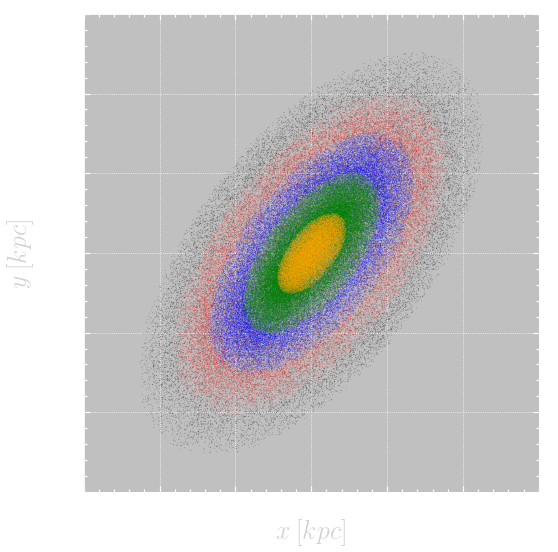

In [39]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

cm = np.loadtxt('/home/ornela/python/barras/lbar_time2.dat')
lbar = cm[:,2]

snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    cm    = snap['subhalo_000/Center'].value
    r200  = snap['subhalo_000/R200'].value
    IDs   = snap['subhalo_000/Str/Ids'].value
    formt = snap['subhalo_000/Str/FormationTime'].value
    pstr  = snap['subhalo_000/Str/Coordinates'].value
    mstr  = snap['subhalo_000/Str/Masses'].value
    vel   = snap['subhalo_000/Str/Velocities'].value
  
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)
    
    aux   = a0/formt - 1.
    tform = tiempo.conv(aux, h, omega_lambda, omega_matter)

#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
    
#paso las velocidades a unidades físicas
    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.


    mstr = mstr/h     #masa a unidades físicas

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(496,300,-1)
    dd.remove(428)
    if isnap in dd:
        raux = 2*r50
    elif (isnap == 428) or ((isnap < 301) & (isnap > 283)):
        raux = r50
    elif (isnap > 271) & (isnap < 284):
        raux = 0.75
    elif isnap < 272:
        raux = 0.5
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn  = np.sqrt(xn**2 + yn**2 + zn**2)
    
    #--------------------------------------------------------------------------------------    

    corte, = np.where(r<raux)
    
    A2max, rmax, phi = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)
    
    phi = phi/2.
    
#Definimos el tamaño de nuestro elipsoide
    aa=lbar[i]
    bb=0.5*lbar[i]
    cc=0.5*lbar[i]
    
#Hacemos la rotación de las coordenadas
    xx = xn*cos(phi)+yn*sin(phi)
    yy = xn*sin(phi)-yn*cos(phi)
    zz = zn
    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide
    
    mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide
    
#     mask0, = np.where((RR>0.8) & (RR<1))
#     mask1, = np.where((RR>0.6) & (RR<0.8))
#     mask2, = np.where((RR>0.4) & (RR<0.6))
#     mask3, = np.where((RR>0.2) & (RR<0.4))
#     mask4, = np.where((RR<0.2))
    
#     ID0 = IDs[mask0]
#     ID1 = IDs[mask1]
#     ID2 = IDs[mask2]
#     ID3 = IDs[mask3]
#     ID4 = IDs[mask4]

    ID    = IDs[mask]
    tform = tform[mask]
    rn_z0 = rn[mask]
    formt = formt[mask]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
#     datos = np.ndarray([len(ID),4])
#     datos[:,0] = ID
#     datos[:,1] = tform
#     datos[:,2] = rn_z0
#     datos[:,3] = formt

#     np.savetxt('/home/ornela/python/salida/part_barra2.dat', datos, fmt=('%15d','%12.6f','%12.6f','%12.6f'))

#     aux = max(len(ID0), len(ID1), len(ID2), len(ID3), len(ID4))

    
#     datos2 = np.zeros([aux,5])
#     datos2[:len(ID0),0] = ID0
#     datos2[:len(ID1),1] = ID1
#     datos2[:len(ID2),2] = ID2
#     datos2[:len(ID3),3] = ID3
#     datos2[:len(ID4),4] = ID4

#     np.savetxt('/home/ornela/python/salida/part_barra_color.dat', datos2, 
#                fmt=('%15d','%15d','%15d','%15d','%15d'))
    
#----------------------------------------------------------------------------------
    
#     fig=plt.figure(1, figsize=(8,8))
#     fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
#     ax=fig.add_subplot(111)
# #     ax.plot(xn,yn,'.', markersize=0.1, color='k')
#     ax.plot(xn[mask0],yn[mask0],'.', markersize=0.1, color='k')
#     ax.plot(xn[mask1],yn[mask1],'.', markersize=0.1, color='r')
#     ax.plot(xn[mask2],yn[mask2],'.', markersize=0.1, color='b')
#     ax.plot(xn[mask3],yn[mask3],'.', markersize=0.1, color='g')
#     ax.plot(xn[mask4],yn[mask4],'.', markersize=0.1, color='orange')
#     ax.set_xlim(-1.5,1.5)
#     ax.set_ylim(-1.5,1.5)
#     ax.spines['bottom'].set_color('w')
#     ax.spines['top'].set_color('w')
#     ax.spines['left'].set_color('w')
#     ax.spines['right'].set_color('w')
#     ax.minorticks_on()
#     ax.tick_params( labelsize=22, colors='lightgray')
#     ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax.set_facecolor('silver')
#     ax.grid(color='w',linestyle=':',which='major')
#     #ax.grid(color='lightgray',linestyle=':',which='minor')
#     ax.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
#     ax.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
#     plt.show()


In [26]:
?savetxt

### Tiempo de formación vs distancia al centro

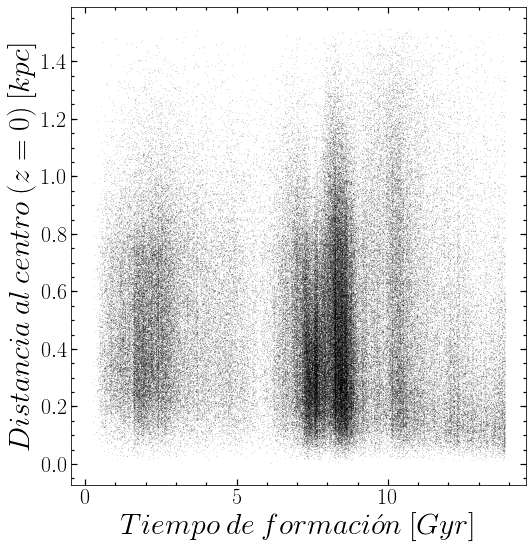

In [8]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


cm    = np.loadtxt('/home/ornela/python/salida/part_barra.dat')
tform = cm[:,1]
rn_z0 = cm[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
#     ax.plot(xn,yn,'.', markersize=0.1, color='k')
# ax.plot(tform[mask0],rn[mask0],'.', markersize=0.1, color='k')
# ax.plot(tform[mask1],rn[mask1],'.', markersize=0.1, color='r')
# ax.plot(tform[mask2],rn[mask2],'.', markersize=0.1, color='b')
# ax.plot(tform[mask3],rn[mask3],'.', markersize=0.1, color='g')
# ax.plot(tform[mask4],rn[mask4],'.', markersize=0.1, color='orange')
ax.plot(tform,rn_z0,'.', markersize=0.1, color='k')
# ax.set_xlim(0,14)
#     ax.set_ylim(-5,5)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$Tiempo\:de\:formaci\'on\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$Distancia\:al\:centro\:(z=0)\:[kpc]$',fontsize=30)#, color='lightgray')
fig.savefig('/home/ornela/Dropbox/Presentaccion_AAA/distz0_time.png', dpi = 100)
plt.show()

## Particulas de la barra en todos los tiempos

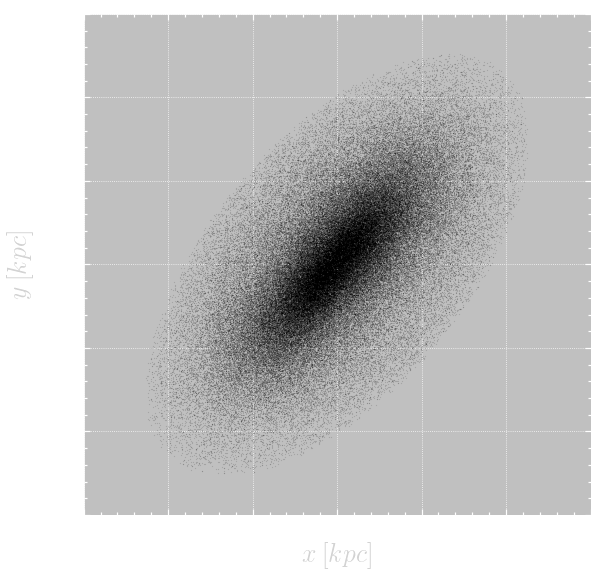

In [23]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    cm    = snap['subhalo_000/Center'].value
    r200  = snap['subhalo_000/R200'].value
    IDs   = snap['subhalo_000/Str/Ids'].value
    pstr  = snap['subhalo_000/Str/Coordinates'].value
    
    pdrk  = snap['subhalo_000/Drk/Coordinates'].value
    pgas  = snap['subhalo_000/Gas/Coordinates'].value
#     mstr = snap['subhalo_000/Str/Masses'].value
#     vel  = snap['subhalo_000/Str/Velocities'].value
  
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)


#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
    
    xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
    ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
    zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
    
    rtot = concatenate([r, rdrk, rgas])
    rsort = np.sort(rtot)
     
#paso las velocidades a unidades físicas
#     v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
#     v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
#     v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.


#     mstr = mstr/h     #masa a unidades físicas

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    rgal = 0.15*r200          #defino el radio de la galaxia

#--------------------------------------------------------------------------
    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    
    mask2 = np.isin(IDs,ID)
    mask3, = np.where(IDs == ID[3])

#     print ID[3]
#     print 'tform', tform[3]
    
#     print xn[mask3]
#     print xn[np.isin(IDs,ID)]
    
    fig=plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.98, top = 0.95, wspace=0.3, hspace= 0.2)
    
    ax1=fig.add_subplot(111)
    ax1.plot(xn[mask2],yn[mask2],'.', markersize=0.1, color='k')
#     ax1.plot(xn[mask3],yn[mask3],'.', markersize=10, color='r')
    ax1.set_xlim(-1.5,1.5)
    ax1.set_ylim(-1.5,1.5)
    ax1.spines['bottom'].set_color('w')
    ax1.spines['top'].set_color('w')
    ax1.spines['left'].set_color('w')
    ax1.spines['right'].set_color('w')
    ax1.minorticks_on()
    ax1.tick_params( labelsize=22, colors='lightgray')
    ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax1.set_facecolor('silver')
    ax1.grid(color='w',linestyle=':',which='major')
    #ax1.grid(color='lightgray',linestyle=':',which='minor')
    ax1.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax1.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax1.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200, color='m',fill=False, ls='--')
#     ax1.add_patch(circ2)
#     circ3= plt.Circle((0,0), radius=rsort[-1], color='g',fill=False, ls='--')
#     ax1.add_patch(circ3)
#     ax1.text(-190, 190, str('%.3f'%time)+'Gyr', 
#             fontsize=22, color='k', ha='left', va='top')
#     ax1.text(r200*cos(pi/4.), r200*sin(pi/4.), str('%12.4f'%r200)+'kpc', 
#             fontsize=18, color='k', ha='left', va='bottom') 
    
    
#     ax2=fig.add_subplot(222)
#     ax2.plot(xn[mask2],zn[mask2],'.', markersize=1, color='k')
#     ax2.plot(xn[mask3],zn[mask3],'.', markersize=10, color='r')
#     ax2.set_xlim(-200,200)
#     ax2.set_ylim(-200,200)
#     ax2.spines['bottom'].set_color('w')
#     ax2.spines['top'].set_color('w')
#     ax2.spines['left'].set_color('w')
#     ax2.spines['right'].set_color('w')
#     ax2.minorticks_on()
#     ax2.tick_params( labelsize=22, colors='lightgray')
#     ax2.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax2.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax2.set_facecolor('silver')
#     ax2.grid(color='w',linestyle=':',which='major')
#     #ax2.grid(color='lightgray',linestyle=':',which='minor')
#     ax2.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
#     ax2.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax2.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200, color='m',fill=False, ls='--')
#     ax2.add_patch(circ2)
#     circ3= plt.Circle((0,0), radius=rsort[-1], color='g',fill=False, ls='--')
#     ax2.add_patch(circ3)

    
#     ax3=fig.add_subplot(223)
#     ax3.plot(yn[mask2],zn[mask2],'.', markersize=1, color='k')
#     ax3.plot(yn[mask3],zn[mask3],'.', markersize=10, color='r')
#     ax3.set_xlim(-200,200)
#     ax3.set_ylim(-200,200)
#     ax3.spines['bottom'].set_color('w')
#     ax3.spines['top'].set_color('w')
#     ax3.spines['left'].set_color('w')
#     ax3.spines['right'].set_color('w')
#     ax3.minorticks_on()
#     ax3.tick_params( labelsize=22, colors='lightgray')
#     ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
#     ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
#     ax3.set_facecolor('silver')
#     ax3.grid(color='w',linestyle=':',which='major')
#     #ax3.grid(color='lightgray',linestyle=':',which='minor')
#     ax3.set_xlabel(r'$y\:[kpc]$', fontsize=26, color='lightgray')
#     ax3.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax3.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200, color='m',fill=False, ls='--')
#     ax3.add_patch(circ2)
#     circ3= plt.Circle((0,0), radius=rsort[-1], color='g',fill=False, ls='--')
#     ax3.add_patch(circ3)
    
#     fig.savefig('/home/ornela/python/salida/prueba4/'+str('%03d'%isnap)+'M31.png', 
#                 facecolor= 'k', frameon= 'True', dpi = 100)
#     plt.clf()
    plt.show()

In [91]:
xx = frange(0,100)
xy = np.array([1,3,5,7,9])
kiki = isin(xx, xy)
xx[kiki]


array([ 1.,  3.,  5.,  7.,  9.])

## Para cada una de las partículas vemos la  distancia en el momento de su nacimiento

In [122]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
isnap = aa[:,0]
aexp  = aa[:,2]

isnap =isnap[::-1]
aexp = aexp[::-1]

z     = a0/aexp - 1.
Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
time  = tiempo.conv(z, h, omega_lambda, omega_matter)

cm0    = np.loadtxt('/home/ornela/python/salida/part_barra.dat')
ID    = cm0[:,0]
tform = cm0[:,1]
rn_z0 = cm0[:,2]
k=0
for i in range(0,len(ID)):
    for j in range(0,len(time)-6):
        
        if ((time[j] > tform[i]) & (time[j+1] < tform[i])):
#             print 'tiempo',time[j]
#             print 'tform', tform[i]
#             print 'snap', isnap[j]
            
            snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap[j])+'.h5py', 'r')
                             
            cm   = snap['subhalo_000/Center'].value
            IDs  = snap['subhalo_000/Str/Ids'].value
            pstr = snap['subhalo_000/Str/Coordinates'].value
            
#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
            xstr = (pstr[:,0]-cm[0])*aexp[j]/h
            ystr = (pstr[:,1]-cm[1])*aexp[j]/h
            zstr = (pstr[:,2]-cm[2])*aexp[j]/h
                             
            xn = e1x*xstr + e1y*ystr + e1z*zstr
            yn = e2x*xstr + e2y*ystr + e2z*zstr
            zn = e3x*xstr + e3y*ystr + e3z*zstr
            rn = np.sqrt(xn**2 + yn**2 + zn**2)
                             
            mask3, = np.where(IDs == ID[i])
#             print 'ID', ID[i]
#             print 'rn', rn[mask3]
#---------------------------------------------------------------------
# me sirve para saber si la particula desaparece antes de su tform
            distancia = rn[mask3]
            if len(distancia)==0:
                k +=1
                print i
print 'total', k
#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
#             archivo1 =  open('/home/ornela/python/salida/tform_barra.dat','a')
#             archivo1.write(str('%12.6f'% tform[i]) +'\t'+
#                        str('%12.6f'% rn_z0[i]) +'\t'+
#                        str('%12.6f'% rn[mask3]) +'\n')
#             archivo1.close()


3
10
12
19
24
39
42
50
70
94
111
115
120
122
132
145
167
172
183
195
227
233
265
268
273
283
291
292
297
330
335
338
355
356
393
448
455
485
491
492
541
548
557
558
560
575
644
645
676
680
692
724
727
770
775
784
807
812
841
844
848
871
890
904
912
915
930
947
979
981
985
986
1011
1031
1033
1063
1071
1075
1091
1118
1133
1166
1189
1196
1197
1202
1204
1270
1322
1346
1350
1352
1389
1390
1397
1430
1444
1449
1459
1468
1473
1478
1485
1506
1512
1551
1559
1560
1562
1569
1570
1571
1577
1579
1590
1594
1605
1607
1624
1629
1638
1650
1686
1723
1733
1754
1757
1782
1794
1802
1806
1828
1829
1832
1836
1840
1844
1852
1853
1855
1863
1874
1879
1881
1884
1897
1898
1899
1904
1910
1912
1923
1953
1976
1982
1984
1990
1992
2000
2013
2022
2028
2032
2046
2048
2056
2060
2064
2095
2126
2146
2147
2150
2158
2163
2180
2191
2196
2199
2208
2231
2257
2260
2266
2278
2294
2298
2305
2311
2320
2323
2329
2331
2348
2362
2380
2384
2401
2404
2430
2489
2493
2494
2496
2500
2502
2511
2512
2517
2521
2524
2542
2549
2551
2604
2632
266

In [121]:
print k

4757


## Tiempo en el que aparece la particula vs tiempo de formación

In [118]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
isnap = aa[:,0]
aexp  = aa[:,2]

isnap =isnap[::-1]
aexp = aexp[::-1]

z     = a0/aexp - 1.
Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
time  = tiempo.conv(z, h, omega_lambda, omega_matter)

cm0    = np.loadtxt('/home/ornela/python/salida/part_barra.dat')
ID    = cm0[:,0]
tform = cm0[:,1]
rn_z0 = cm0[:,2]

for i in range(0,len(ID)-1):
    for j in range(0,len(time)-1):
        
        snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap[j])+'.h5py', 'r')

        IDs  = snap['subhalo_000/Str/Ids'].value
       
        mask3, = np.where(IDs == ID[i])
        
        if not mask3:
#             print 'tform', tform[i]
#             print 'time', time[j]
#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
            archivo1 =  open('/home/ornela/python/salida/test_data.dat','a')
            archivo1.write(str('%03d'% isnap[j]) +'\t'+
                       str('%12.6f'% tform[i]) +'\t'+
                       str('%12.6f'% time[j-1]) +'\t'+
                       str('%12.6f'% time[j]) +'\n')
            archivo1.close()
            
            break


In [113]:
xx = frange(0,100)
coso, = np.where(xx == 1)
if not coso:
    print 'jaja'

In [4]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


cm0 = np.loadtxt('/home/ornela/python/salida/test_data.dat')
tform = cm0[:,1]
time  = cm0[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
#     ax.plot(xn,yn,'.', markersize=0.1, color='k')
ax.plot(tform,time,'.', markersize=5, color='k')
#     ax.set_xlim(-5,5)
#     ax.set_ylim(-5,5)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
ax.set_facecolor('silver')
ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel('Tiempo de formaci\'on [Gyr]', fontsize=26, color='lightgray')
ax.set_ylabel('Tiempo donde aparece [Gyr]',fontsize=26, color='lightgray')
plt.show()
    
        

[ 13.86663323  13.84063729  13.81461045  13.7871804   13.76109011
  13.7349689   13.70881673  13.68125469  13.65503896  13.62879224
  13.60251452  13.57620579  13.54847888  13.52210647  13.49570302
  13.46926851  13.44280295  13.41770165  13.39117558  13.36461843
  13.3380302   13.31141087  13.28476044  13.25807892  13.23136629
  13.20462255  13.1778477   13.15104174  13.12561791  13.09875137
  13.07327015  13.04634301  13.01938476  12.99381668  12.96679785
  12.93974793  12.91409301  12.88698253  12.85984097  12.83409925
  12.80689717  12.78109814  12.75383558  12.72797926  12.70065625
  12.67474269  12.64735928  12.62138851  12.59394475  12.56791683
  12.54041277  12.51432776  12.48821499  12.46062141  12.43445164
  12.40679793  12.38057122  12.35431685  12.3265739   12.30026272
  12.27392392  12.24755753  12.22116359  12.1947421   12.16829309
  12.14034486  12.11383937  12.08730643  12.06074608  12.03415835
  12.00606384  11.9794199   11.95274867  11.92753413  11.90080992
  11.87405

KeyboardInterrupt: 

In [18]:
datos = np.zeros([len(ID),491])

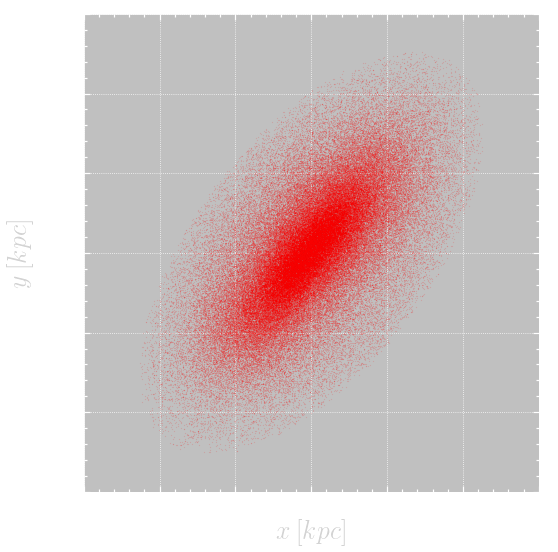

In [11]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('/home/ornela/python/ornella/redshift_outputs.txt')
aexp = aa[:,2]

cm = np.loadtxt('/home/ornela/python/barras/lbar_time2.dat')
lbar = cm[:,2]

cm = np.loadtxt('/home/ornela/python/salida/tform_barra2.dat')
IDD   = cm[:,0]
r0    = cm[:,3]



snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    cm    = snap['subhalo_000/Center'].value
    r200  = snap['subhalo_000/R200'].value
    IDs   = snap['subhalo_000/Str/Ids'].value
    formt = snap['subhalo_000/Str/FormationTime'].value
    pstr  = snap['subhalo_000/Str/Coordinates'].value
    mstr  = snap['subhalo_000/Str/Masses'].value
    vel   = snap['subhalo_000/Str/Velocities'].value
  
    z     = a0/aexp[isnap] - 1.
    Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time  = tiempo.conv(z, h, omega_lambda, omega_matter)
    
    aux   = a0/formt - 1.
    tform = tiempo.conv(aux, h, omega_lambda, omega_matter)

#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)
    
#paso las velocidades a unidades físicas
    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.


    mstr = mstr/h     #masa a unidades físicas

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    rgal = 0.15*r200          #defino el radio de la galaxia

    limit = np.where(r<rgal)         #hago un límite de los r dentro de rgal
    r_sort = np.sort(r[limit])       #acomodo los r de menor a mayor
    r_indice = np.argsort(r[limit])  #saco los argumentos de r acomodados de menor a mayor

    Mc_str = cumsum(mstr[limit][r_indice])  #masa acumulada en cada radio dentro de rgal
    Mgal = Mc_str[-1]  #masa total de la galaxia

#Calculo de los radios a 50% y 90% la masa de la galaxia
#-----------------------------------------------------------------------
    razon = Mc_str/Mgal 
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]   #radio a 90% la masa
    r50 = r_sort[cincuenta][-1] #radio a 50% la masa
    
#-----------------------------------------------------------------------
#componentes de la velocidad del centro de masa
    veloc, = np.where(r < r50)
    
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm


#calculo el raux
#     raux = 2*r50
#------------------------------------------------------------------------------------
    dd = range(496,300,-1)
    dd.remove(428)
    if isnap in dd:
        raux = 2*r50
    elif (isnap == 428) or ((isnap < 301) & (isnap > 283)):
        raux = r50
    elif (isnap > 271) & (isnap < 284):
        raux = 0.75
    elif isnap < 272:
        raux = 0.5
#-----------------------------------------------------------------------------------

#hago la rotación de las coordenadas respecto del momento angular    
    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn  = np.sqrt(xn**2 + yn**2 + zn**2)
    
    #--------------------------------------------------------------------------------------    

    corte, = np.where(r<raux)
    
    A2max, rmax, phi = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)
    
    phi = phi/2.
    
#Definimos el tamaño de nuestro elipsoide
    aa=lbar[i]
    bb=0.5*lbar[i]
    cc=0.5*lbar[i]
    
#Hacemos la rotación de las coordenadas
    xx = xn*cos(phi)+yn*sin(phi)
    yy = xn*sin(phi)-yn*cos(phi)
    zz = zn
    RR = np.sqrt((xx/aa)**2+(yy/bb)**2+(zz/cc)**2) # formula del elipsoide
    
    mask, = np.where(RR<1) #seleccionamos las particulas dentro del elipsoide

    ID    = IDs[mask]
#     tform = tform[mask]
#     rn_z0 = rn[mask]
#     formt = formt[mask]

    xn = xn[mask]
    yn = yn[mask]
    
    mask2, = np.where(log10(r0)<0.2)
    mask3, = np.where(log10(r0)>0.2)
      
#----------------------------------------------------------------------------------
    
    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
#     ax.plot(xn[mask3],yn[mask3],'.', markersize=0.1, color='b')
    ax.plot(xn[mask2],yn[mask2],'.', markersize=0.1, color='r')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.minorticks_on()
    ax.tick_params( labelsize=22, colors='lightgray')
    ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax.set_facecolor('silver')
    ax.grid(color='w',linestyle=':',which='major')
    #ax.grid(color='lightgray',linestyle=':',which='minor')
    ax.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
    plt.show()
